In [6]:

import pandas as pd 
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
np.random.seed(0)
random.seed(0)

import re
from nltk.corpus import stopwords 
from nltk.stem import SnowballStemmer
from collections import Counter

import nltk
nltk.download('stopwords')

nltk.download('punkt')

nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# loading dataset
df = pd.read_csv('McDonald_s_Reviews.csv', encoding='latin-1')
df.head(20)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
5,6,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 weeks ago,I work for door dash and they locked us all ou...,1 star
6,7,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,If I could give this location a zero on custo...,1 star
7,8,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a year ago,Came in and ordered a Large coffee w/no ice. T...,1 star
8,9,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Went thru drive thru. Ordered. Getting home no...,1 star
9,10,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,"I'm not really a huge fan of fast food, but I ...",4 stars


In [8]:
# data cleaning
def text_clean(text):
    
    text=re.sub("\[.*#&]"," ",text)
    
    
    #removing the emails
    text=re.sub("https?://\S+|www\.\S+","",text)
    
    text=re.sub("[^a-zA-Z0-9\s]+","",text)
    
    #removing the numbers
    text = re.sub('\w*\d\w*', '', text)
    
    #removing the stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()

    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

   
    return text
df["clean_review"]=df["review"].apply(text_clean)      
#df['clean_review'] = [clean(review) for review in df['review']]
df['clean_review'].head(20)
#  

#import re
#import string

#def clean(review):
#    review = review.lower()
#    review = review.replace('ï', '')
#    review = review.replace('¿', '')
#    review = review.replace('½', '')
#    review = review.replace('ý', '')
#    review = " ".join(review.split())
#    review = review.rstrip()
#    return review

#df['clean_review'] = [clean(review) for review in df['review']]
#df['clean_review'].head(20)

0     Why look like someone spit food I normal trans...
1     Itd McDonalds It far food atmosphere go The st...
2     Made mobile order got speaker checked Line mov...
3     My mc Crispy chicken sandwich customer service...
4     I repeat order times drive thru still manage m...
5     I work door dash locked us wait long line reas...
6     If I could give location zero customer service...
7     Came ordered Large coffee wno ice They handed ...
8     Went thru drive thru Ordered Getting home noti...
9     Im really huge fan fast food I teenage daughte...
10                                       Worst McDonald
11    We stopped quick breakfast It crowded inside p...
12    The morning crew seems fast efficient Night cr...
13    Today disappointed restaurant get FULL order m...
14    Ordered food burger wrong left part order also...
15    This dine experience The tables dirty get food...
16    The line wS extremely big moving slowly plus a...
17    The boy attended made wait saw drink wrong

In [9]:
# create tf-idf and vocab list for each rating 

from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_list = []
tfidf_vocab = {}

for rating in sorted(df.rating.unique()):
    tfidf_list.append(tfidf_vectorizer.fit_transform(df[df.rating == rating].clean_review))
    tfidf_vocab[rating] = tfidf_vectorizer.get_feature_names_out()

[print(f'\nRating: {rating} stars', '\nTFIDF array: ', tfidf.toarray(), '\nVocab list: ', tfidf_vocab[rating]) for rating, tfidf in zip(sorted(df.rating.unique()), tfidf_list)]



Rating: 1 star stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['aaaah' 'aak' 'aarp' ... 'zombies' 'zone' 'zoo']

Rating: 2 stars stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['abilene' 'ability' 'able' ... 'yummy' 'zero' 'zoo']

Rating: 3 stars stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['aarp' 'ab' 'abd' ... 'zoo' 'zoolocation' 'zooorder']

Rating: 4 stars stars 
TFIDF array:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
Vocab list:  ['aa' 'aaa

[None, None, None, None, None]

In [10]:
# dimensionality reduction to perform all-by-all cosine similarities 
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize


shrunk_norm_matrix_list = []

for tfidf in tfidf_list:
    shrunk_norm_matrix_list.append(normalize(TruncatedSVD(n_components=100, random_state=42).fit_transform(tfidf)))
    
cosine_similarity_matrix = [shrunk_norm_matrix @ shrunk_norm_matrix.T for shrunk_norm_matrix in shrunk_norm_matrix_list]
cosine_similarity_matrix

[array([[ 1.        ,  0.10446124, -0.0060935 , ..., -0.0135818 ,
          0.01164592,  0.07123813],
        [ 0.10446124,  1.        ,  0.09412131, ..., -0.02263772,
         -0.03067214,  0.08762967],
        [-0.0060935 ,  0.09412131,  1.        , ..., -0.02322513,
          0.08569414,  0.16260762],
        ...,
        [-0.0135818 , -0.02263772, -0.02322513, ...,  1.        ,
          0.62438149,  0.03187882],
        [ 0.01164592, -0.03067214,  0.08569414, ...,  0.62438149,
          1.        ,  0.11591318],
        [ 0.07123813,  0.08762967,  0.16260762, ...,  0.03187882,
          0.11591318,  1.        ]]),
 array([[ 1.        ,  0.1343296 ,  0.0795186 , ...,  0.19536665,
          0.06775968,  0.01617256],
        [ 0.1343296 ,  1.        , -0.01388971, ...,  0.02904523,
          0.01045288,  0.03493195],
        [ 0.0795186 , -0.01388971,  1.        , ..., -0.01464992,
          0.03416576, -0.0376325 ],
        ...,
        [ 0.19536665,  0.02904523, -0.01464992, ...,  

In [11]:
# elbow curve function
from sklearn.cluster import MiniBatchKMeans
import time

np.random.seed(0)
def generate_elbow_plot(matrix_list):
    start_time = time.time()
    for index, matrix in enumerate(matrix_list):
        k_values = range(1, 61)
        inertia_values = [MiniBatchKMeans(k, random_state=42).fit(matrix).inertia_ for k in k_values]
        plt.plot(k_values, inertia_values, label=[f'{index+1} star'])
        plt.xlabel('K')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.legend()
    plt.show()
    return print(f'{round(time.time() - start_time)} seconds')

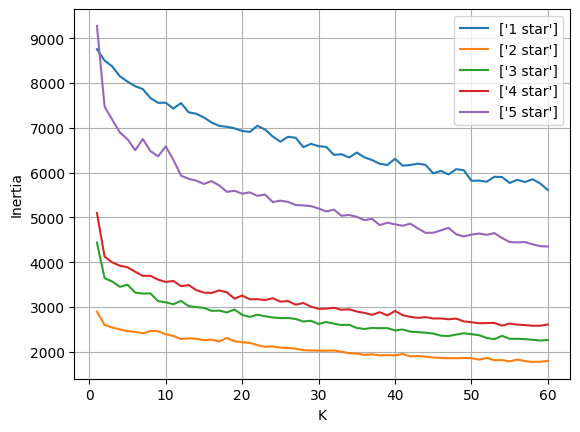

89 seconds


In [12]:
import warnings
warnings.filterwarnings("ignore")

# elbow curve of all ratings 
generate_elbow_plot(shrunk_norm_matrix_list)

In [13]:
# function that creates KMeans for reviews
from sklearn.cluster import KMeans

def compute_cluster_groups(shrunk_norm_matrix, k=10, review=df['clean_review']):
    cluster_model = KMeans(n_clusters=k, random_state=42)
    clusters = cluster_model.fit_predict(shrunk_norm_matrix)
    df = pd.DataFrame({'Index' : range(clusters.size), 'Cluster' : clusters, 'Review' : review})
    return [df_cluster for _, df_cluster in df.groupby('Cluster')]

In [14]:
# clusters for each rating 
cluster_groups = []

for index, rating in enumerate(sorted(df.rating.unique())):
    cluster_groups.append(compute_cluster_groups(shrunk_norm_matrix_list[index], review=df[df.rating == rating].clean_review))
    
print([("For: ", rating, "\n", cluster_groups[index]) for index, rating in enumerate(sorted(df.rating.unique()))][:10])

[('For: ', '1 star', '\n', [       Index  Cluster                                             Review
5          3        0  I work door dash locked us wait long line reas...
33        21        0  Just spent minutes waiting McDonalds According...
74        43        0  When specifically say plain AND dry make sure ...
92        53        0  Attempted go drive thru It said hour however o...
121       70        0  I found pieces hair food I also Pay pancake sy...
...      ...      ...                                                ...
33220   9366        0  It third time go night dont let us eat We alwa...
33227   9371        0  Incomprehensible things come across neck cant ...
33237   9376        0  In They sick supposed open hours day respond D...
33295   9403        0  It hours update night Saturday want serve us i...
33296   9404        0  I ordered order online I went look I leave due...

[450 rows x 3 columns],        Index  Cluster                                             Revie

In [15]:
#!pip install wordcloud
from wordcloud import WordCloud

def cluster_to_wordcloud(cluster_group, max_words=10):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(cluster_group)
    vocab_list = vectorizer.get_feature_names_out()
    
    # create a rank list of words
    df_ranked = pd.DataFrame({'Word' : vocab_list, 'Sum TFIDF': tfidf_matrix.toarray().sum(axis=0)}).sort_values('Sum TFIDF', ascending=False)
    
    # create word score
    word_to_score = {word: score for word, score in df_ranked[:max_words].values}
    
    # initialize wordcloud object
    wordcloud_generator = WordCloud(background_color='white')

    # fit wordcloud_generator to word_to_score
    wordcloud_image = wordcloud_generator.fit_words(word_to_score)
    
    return wordcloud_image


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
def grid_wordcloud(cluster_groups, rating_num, max_words=10, rows=5, columns=2, figsize=(10,10)):
    rating_list = []
    fig, ax = plt.subplots(rows, columns, figsize=figsize)
    for index, cluster in enumerate(cluster_groups):
        row = index // columns
        column = index % columns
        wordcloud_image = cluster_to_wordcloud(cluster_groups[index].Review, max_words)
        ax[row][column].imshow(wordcloud_image, interpolation='bilinear')
        ax[row][column].set_title(f'Cluster: {index}')
        ax[row][column].set_xticks([])
        ax[row][column].set_yticks([])
    fig.suptitle(f"{rating_num}:", fontsize=20)

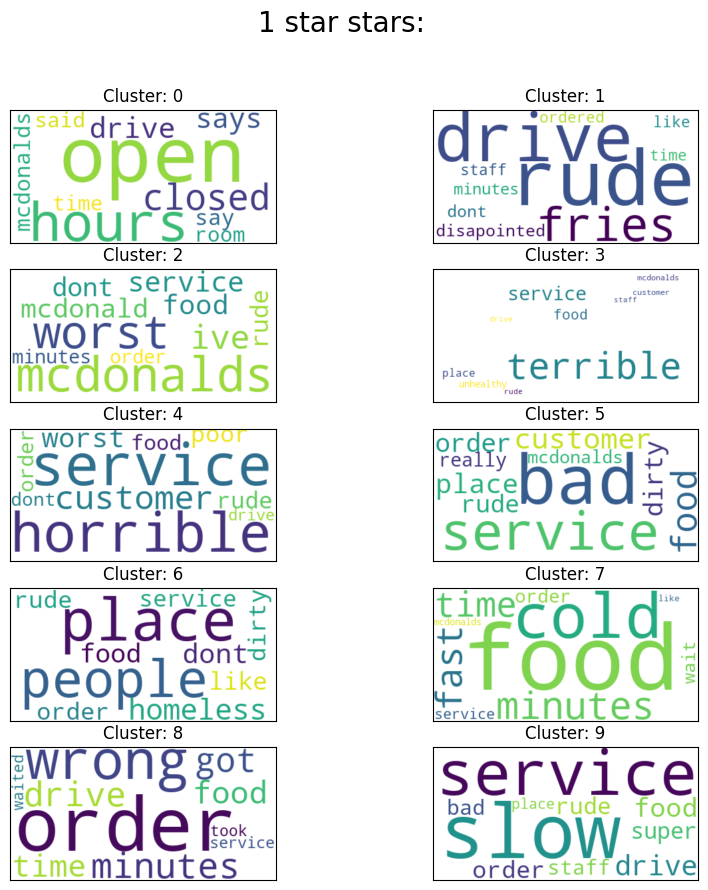

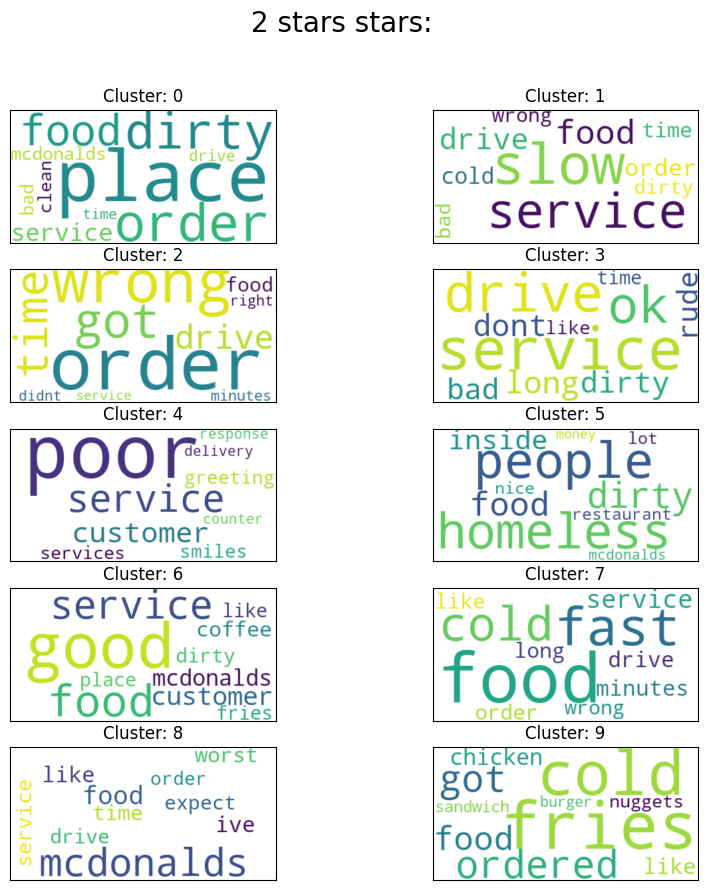

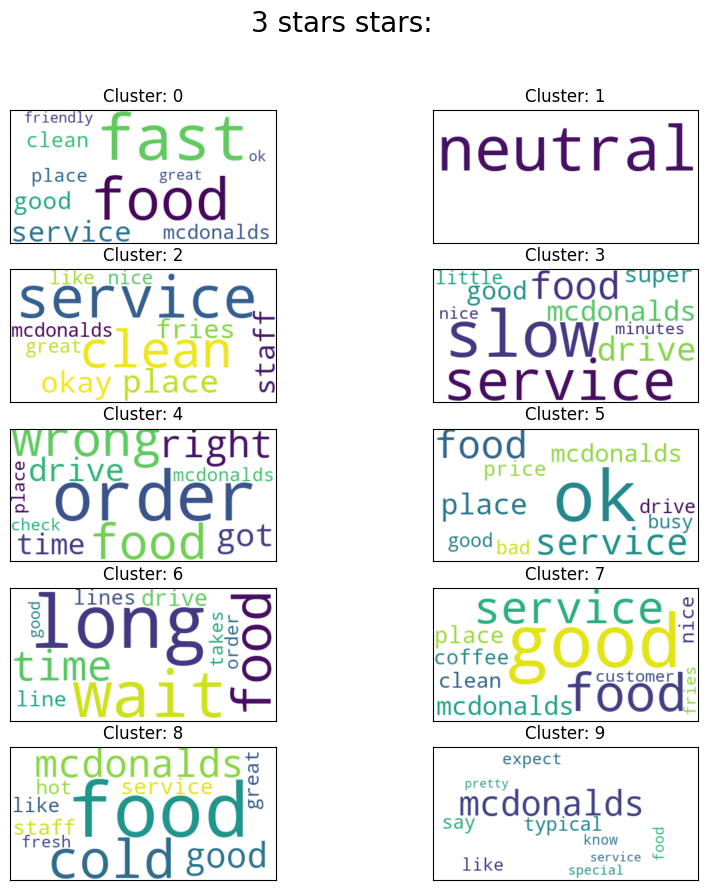

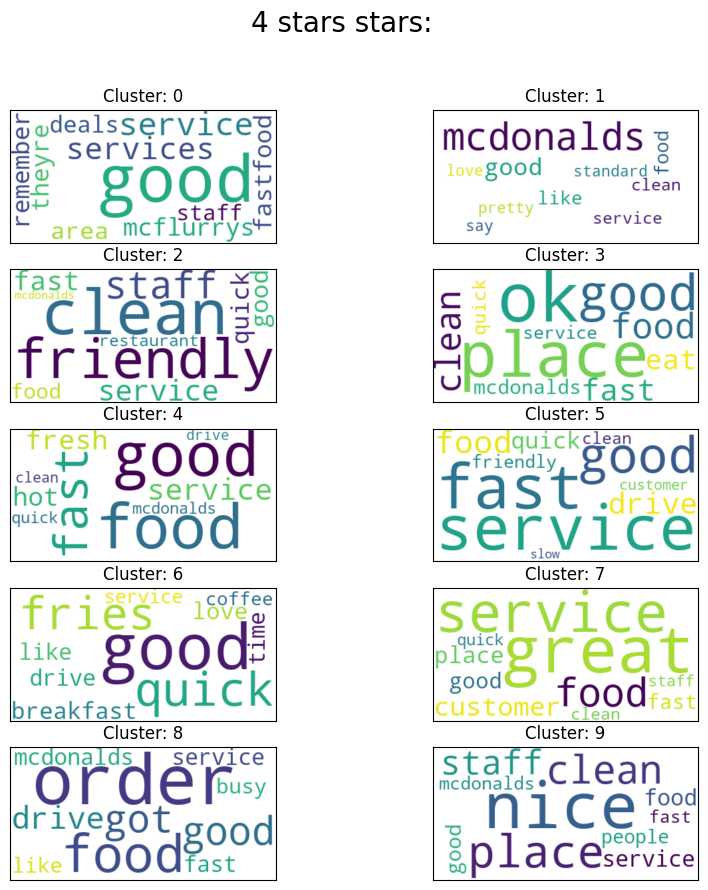

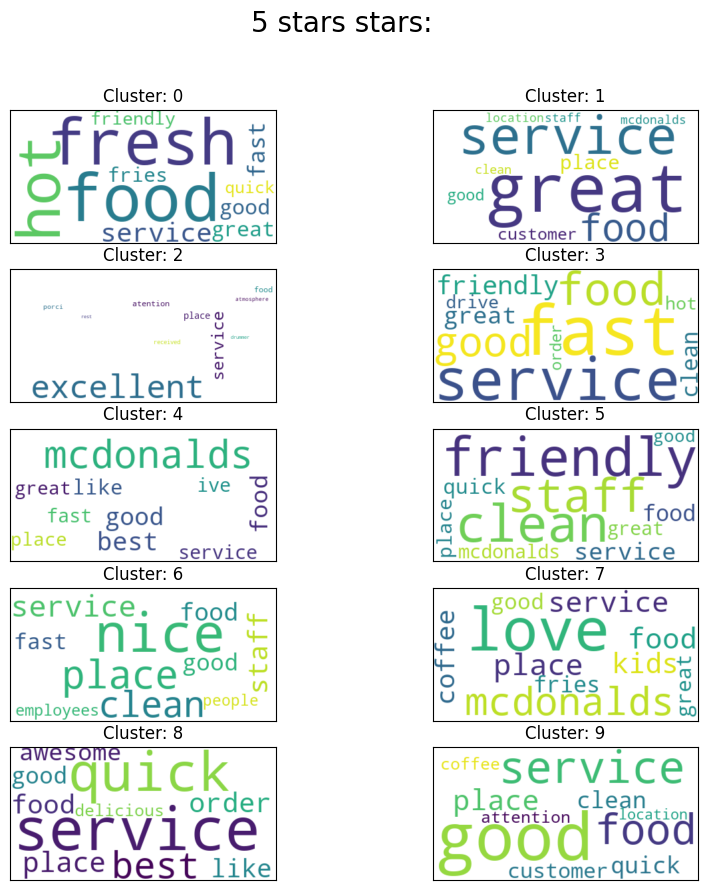

In [17]:
# all clusters wordclouds for each rating
for index, rating in enumerate(sorted(df.rating.unique())):
    grid_wordcloud(cluster_groups[index], rating_num=f'{rating} stars')


graph for frequency of words

In [18]:
df=df[['review','rating']]
df.columns=['text','label']

In [19]:
df['text']=df['text'].astype('str') #converting all sentence and numbers into string
#converting into the lowercase
def lowercase(text):
    text=text.lower()
    return text

df['text']=df['text'].apply(lowercase)

df["text"]=df["text"].apply(text_clean)  

In [20]:
stemmer = SnowballStemmer('english')


def stem_text(text):
    
    # Tokenize the input text into individual words
    tokens=nltk.word_tokenize(text)
    
    
    # stemmer_token is nltk feature that implement snowballstemer for each word
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Join the stemmed tokens back into a single string
    return ' '.join(stemmed_tokens)

df['text'] = df['text'].apply(stem_text)
    

In [21]:
replacements = {'1 star': 1, '2 stars': 2, '3 stars': 3,'4 stars': 4,'5 stars': 5}

# Replace the values in multiple columns
df.replace(replacements, inplace=True)

<Figure size 1000x500 with 0 Axes>

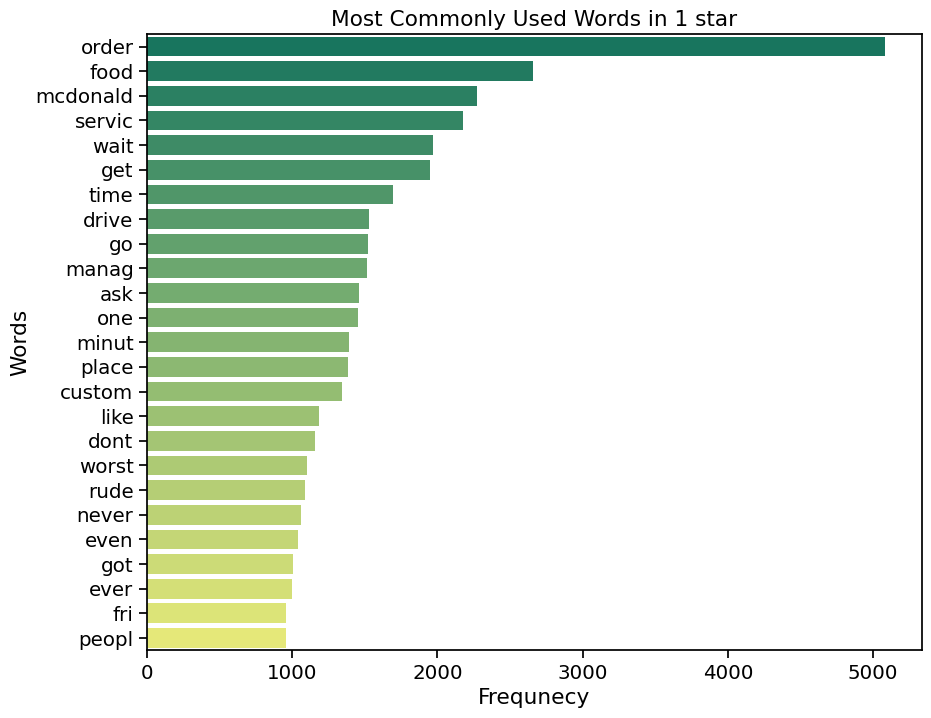

In [22]:
star_ratings_1= " ".join(df[df['label'] == 1]['text']) 

plt.figure(figsize=(10,5))
def plot_words_freq(words):
    
    
    #counter is predifined function which is used to count words
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in 1 star")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words") 
    return plt.show();

plot_words_freq((star_ratings_1).split());
plt.show()

<Figure size 1000x500 with 0 Axes>

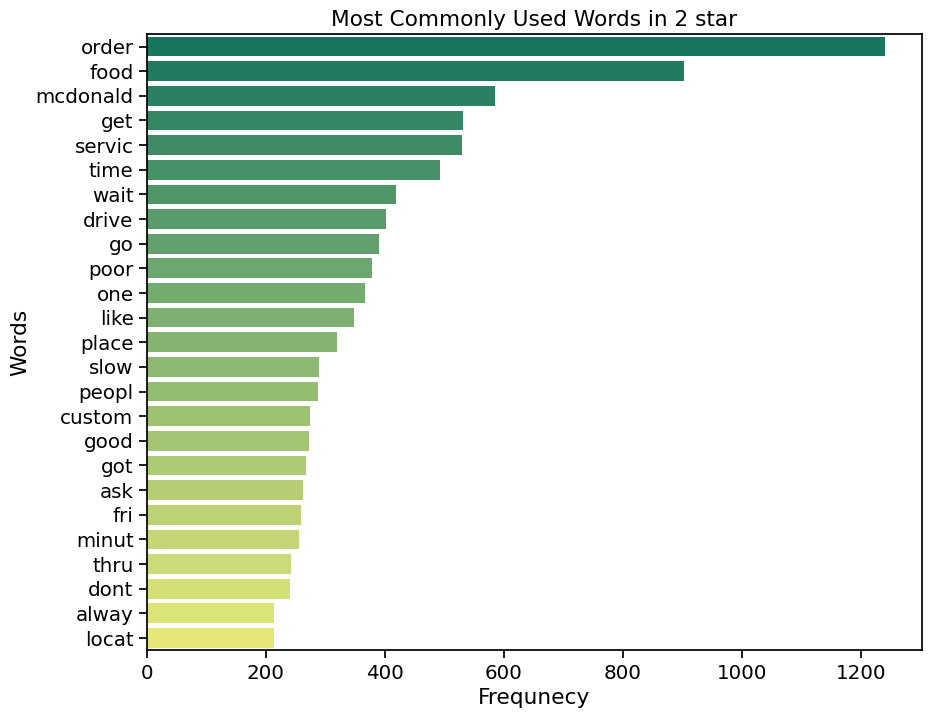

In [23]:
star_ratings_2= " ".join(df[df['label'] ==2]['text']) 
plt.figure(figsize=(10,5))
def plot_words_freq(words):
    
    
    #counter is predifined function which is used to count words
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in 2 star")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words") 
    return plt.show();


plot_words_freq((star_ratings_2).split());
plt.show()

<Figure size 1000x500 with 0 Axes>

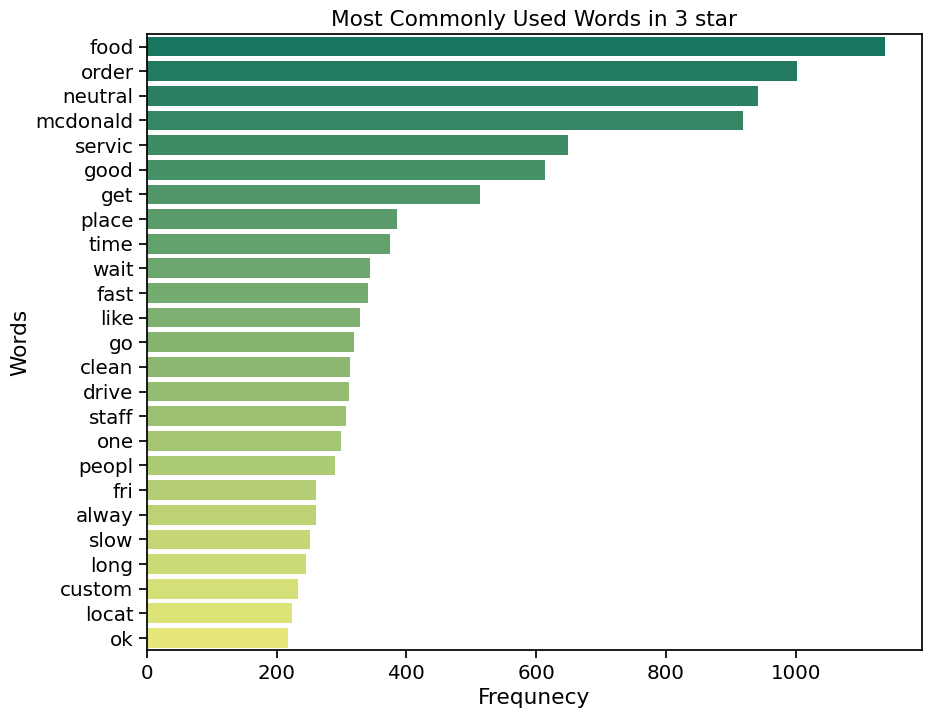

In [24]:
star_ratings_3= " ".join(df[df['label'] ==3]['text']) 
plt.figure(figsize=(10,5))
def plot_words_freq(words):
    
    
    #counter is predifined function which is used to count words
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in 3 star")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words") 
    return plt.show();


plot_words_freq((star_ratings_3).split());
plt.show()

<Figure size 1000x500 with 0 Axes>

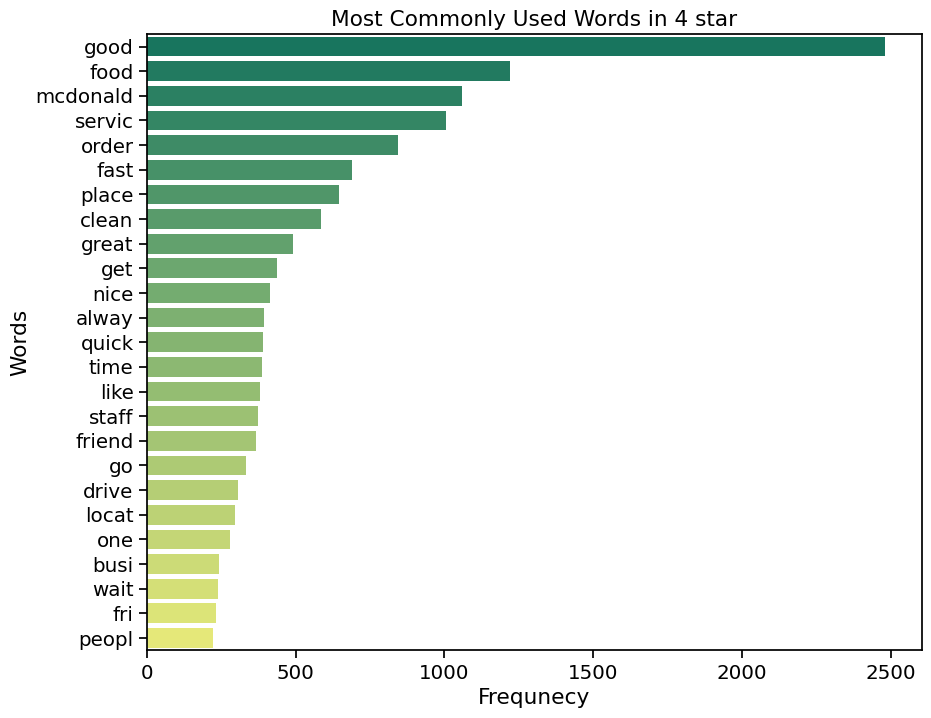

In [25]:
star_ratings_4= " ".join(df[df['label'] ==4]['text']) 
plt.figure(figsize=(10,5))
def plot_words_freq(words):
    
    
    #counter is predifined function which is used to count words
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in 4 star")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words") 
    return plt.show();


plot_words_freq((star_ratings_4).split());
plt.show()

<Figure size 1000x500 with 0 Axes>

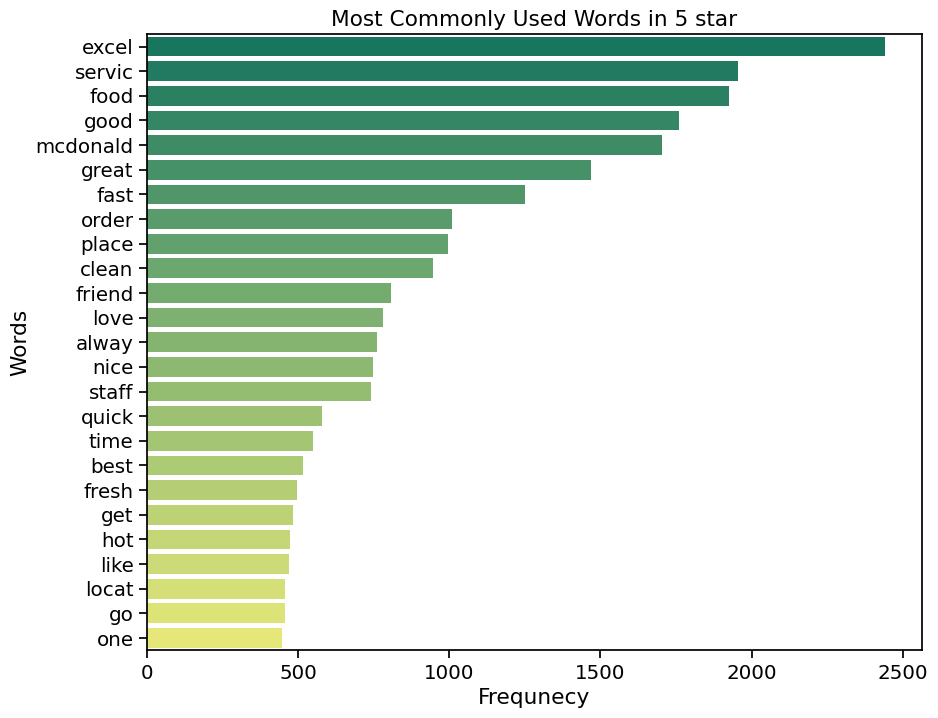

In [26]:
star_ratings_5= " ".join(df[df['label'] ==5]['text']) 
plt.figure(figsize=(10,5))
def plot_words_freq(words):
    
    
    #counter is predifined function which is used to count words
    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in 5 star")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words") 
    return plt.show();


plot_words_freq((star_ratings_5).split());
plt.show()